In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import sys

[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]
from get_rat_data import *

In [28]:
df = get_rat_viol_data()
df["choice_cat"] = df.choice.fillna(2)
vs = df.query("training_stage > 2").groupby("animal_id").violation.mean().values

vs.std(), vs.mean()

returning dataset for all animals


(0.1023214480395597, 0.28992318071664996)

In [30]:
vs_all = df.groupby("animal_id").violation.mean().values

vs_all.std(), vs_all.mean()

(0.10167562957911057, 0.2905417193100866)

In [15]:
df["choice_cat"] = df.choice.fillna(2)

In [17]:
df["choice_cat"] = df.choice_cat.astype("category")

In [53]:
grouped_data = df.groupby(["animal_id", "choice_cat"]).choice_cat.value_counts()

animal_id  choice_cat
W051       0.0           26433
           1.0           25874
           2.0           10060
W060       0.0           22937
           1.0           23607
           2.0            8601
W061       0.0           14960
           1.0           15192
           2.0           11094
W062       0.0           11525
           1.0           12261
           2.0           10998
W065       0.0           18394
           1.0           19512
           2.0           12199
W066       0.0           12863
           1.0           13472
           2.0            8097
W068       0.0           14127
           1.0           15574
           2.0           10124
W072       0.0           11834
           1.0           12193
           2.0            9785
W073       0.0           14707
           1.0           14892
           2.0            9216
W074       0.0           21447
           1.0           20686
           2.0            8953
W075       0.0           28194
           1.0   

In [60]:
# Count the occurrences of each combination of 'animal_id' and 'choice_cat'
grouped_data = df.groupby(["animal_id", "choice_cat"]).size().reset_index(name="count")

# Calculate the total count for each animal
total_count_per_animal = df.groupby("animal_id").size().reset_index(name="total_count")

# Merge the two dataframes to get both count and total_count in one dataframe
merged_data = pd.merge(grouped_data, total_count_per_animal, on="animal_id")

# Calculate the proportion
merged_data["proportion"] = merged_data["count"] / merged_data["total_count"]
choice_mapping = {0: "Left", 1: "Right", 2: "Violation"}
merged_data["choice_label"] = merged_data["choice_cat"].map(choice_mapping)

In [252]:
choice_palette = ["#e03412", "#1d85c2", "purple"]

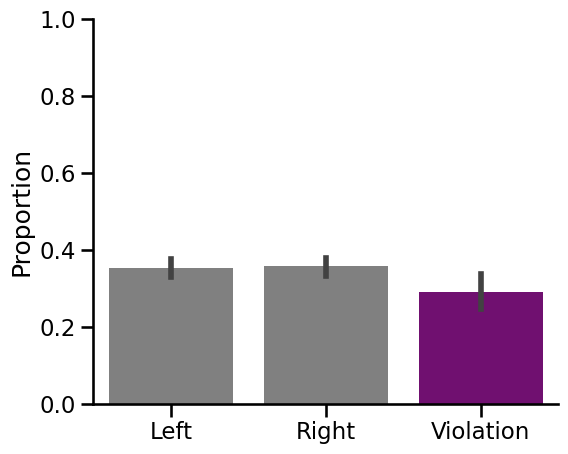

In [250]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(
    x="choice_label",
    y="proportion",
    data=merged_data,
    palette=["grey", "grey", "purple"],
    ax=ax,
)

ax.set(
    xlabel="",
    ylabel="Proportion",
    ylim=(0, 1),
)


hue_order = sorted(
    merged_data["choice_cat"].unique(),
)
sns.despine()

Text(0.5, 1.0, 'Distribution of Choices Across Animals')

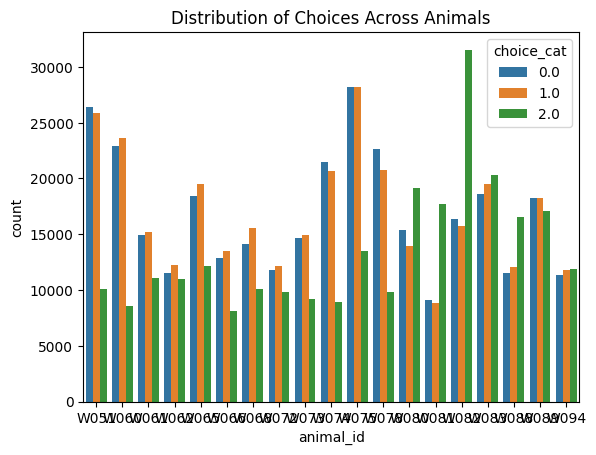

In [37]:
sns.barplot(x="animal_id", y="count", hue="choice_cat", data=grouped_data)
plt.title("Distribution of Choices Across Animals")

In [40]:
df.choice_cat.value_counts()

choice_cat
1.0    322412
0.0    320715
2.0    256691
Name: count, dtype: int64

<Axes: xlabel='choice_cat', ylabel='count'>

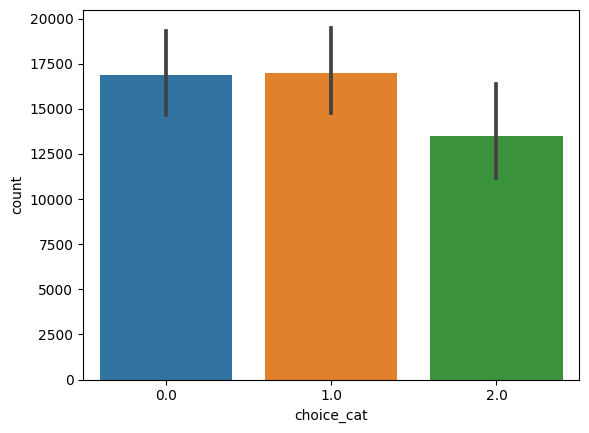

In [38]:
sns.barplot(x="choice_cat", y="count", data=grouped_data)

## Akrami Rat Weights

In [267]:
feature = [
    "Stim A",
    "Stim B",
    "Prev Correct",
    "Stim A - 1",
    "Stim B - 1",
    "Stim A - 2",
    "Stim B - 2",
    "Sensory Mean",
    "Bias",
]
weight = [5, -7, 0.5, 0.5, -0.3, 0.4, -0.2, 0.1, 0.04]

color = [
    choice_palette[0],
    choice_palette[1],
    "#9c54a8",
    "#87d499",
    "#87d499",
    "#87d499",
    "#87d499",
    "#87d499",
    "yellow",
]

simulated_df = pd.DataFrame({"Feature": feature, "Weight": weight, "Color": color})

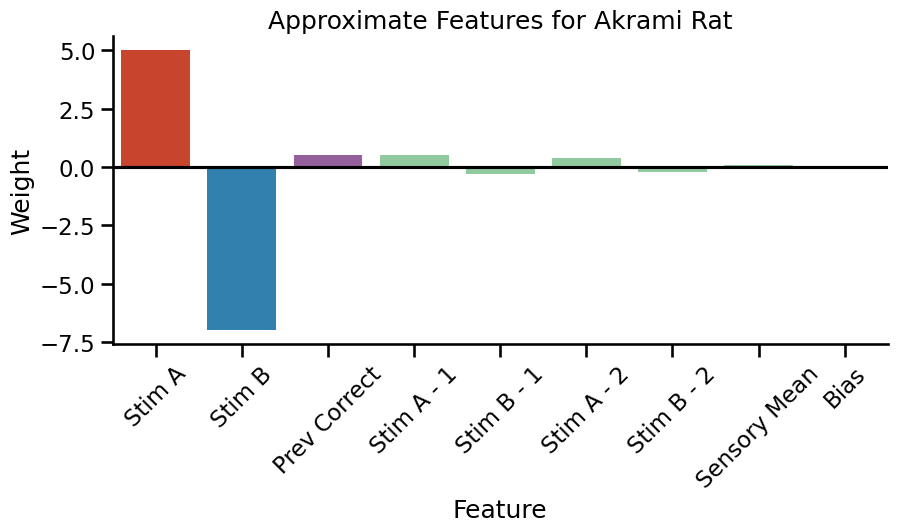

In [268]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=simulated_df,
    x="Feature",
    y="Weight",
    hue_order=feature,
    palette=simulated_df.Color,
)
_ = plt.xticks(rotation=45)

ax.axhline(0, color="k")
_ = ax.set_title("Approximate Features for Akrami Rat")
sns.despine()

## Training Plot

In [52]:
df = get_rat_viol_data(animal_ids="W075")

grouped_df = df.groupby(["animal_id", "session", "training_stage"]).hit.mean()

# Calculate the rolling mean with a window of 14 sessions for each subject
rolling_mean = grouped_df.rolling(window=7).mean().reset_index()

returning data for W075


[Text(0, 0.5, 'Hit Rate'), Text(0.5, 0, 'Session')]

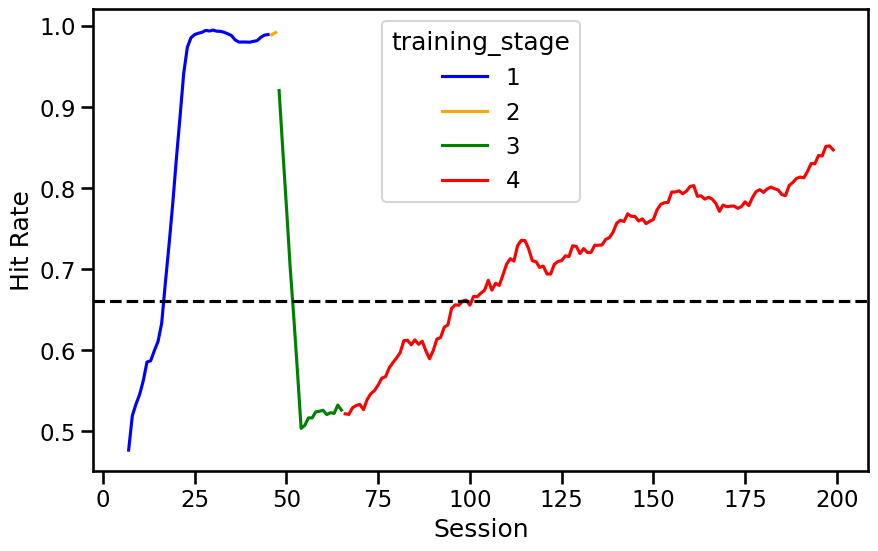

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=rolling_mean,
    y="hit",
    x="session",
    hue="training_stage",
    palette=["blue", "orange", "green", "red"],
    ax=ax,
)

ax.axhline(y=0.66, color="k", linestyle="--")
ax.set(ylabel=("Hit Rate"), xlabel="Session")

## Time to Train Etc

In [77]:
MODE = "local"
import platform

if platform.system() == "Windows":
    DATA_PATH = pathlib.Path("X:\jbreda\learning_project\data")
else:
    if MODE == "cup":
        DATA_PATH = pathlib.Path("/Volumes/brody/jbreda/learning_project/data")
    elif MODE == "local":
        DATA_PATH = pathlib.Path(
            "/Users/jessbreda/Desktop/github/animal-learning/data/raw"
        )
F_NAME = "rat_behavior.csv"
RAT_DF = pd.read_csv(DATA_PATH / F_NAME)
RAT_DF["violation"] = RAT_DF.hit.isnull()
RAT_DF.subject_id = RAT_DF.subject_id.astype("string")
RAT_DF["n_trial"] = RAT_DF.index
RAT_DF["training_stage_cat"] = RAT_DF["training_stage"].astype("category")
RAT_DF["delay"] = RAT_DF.delay.round(2)

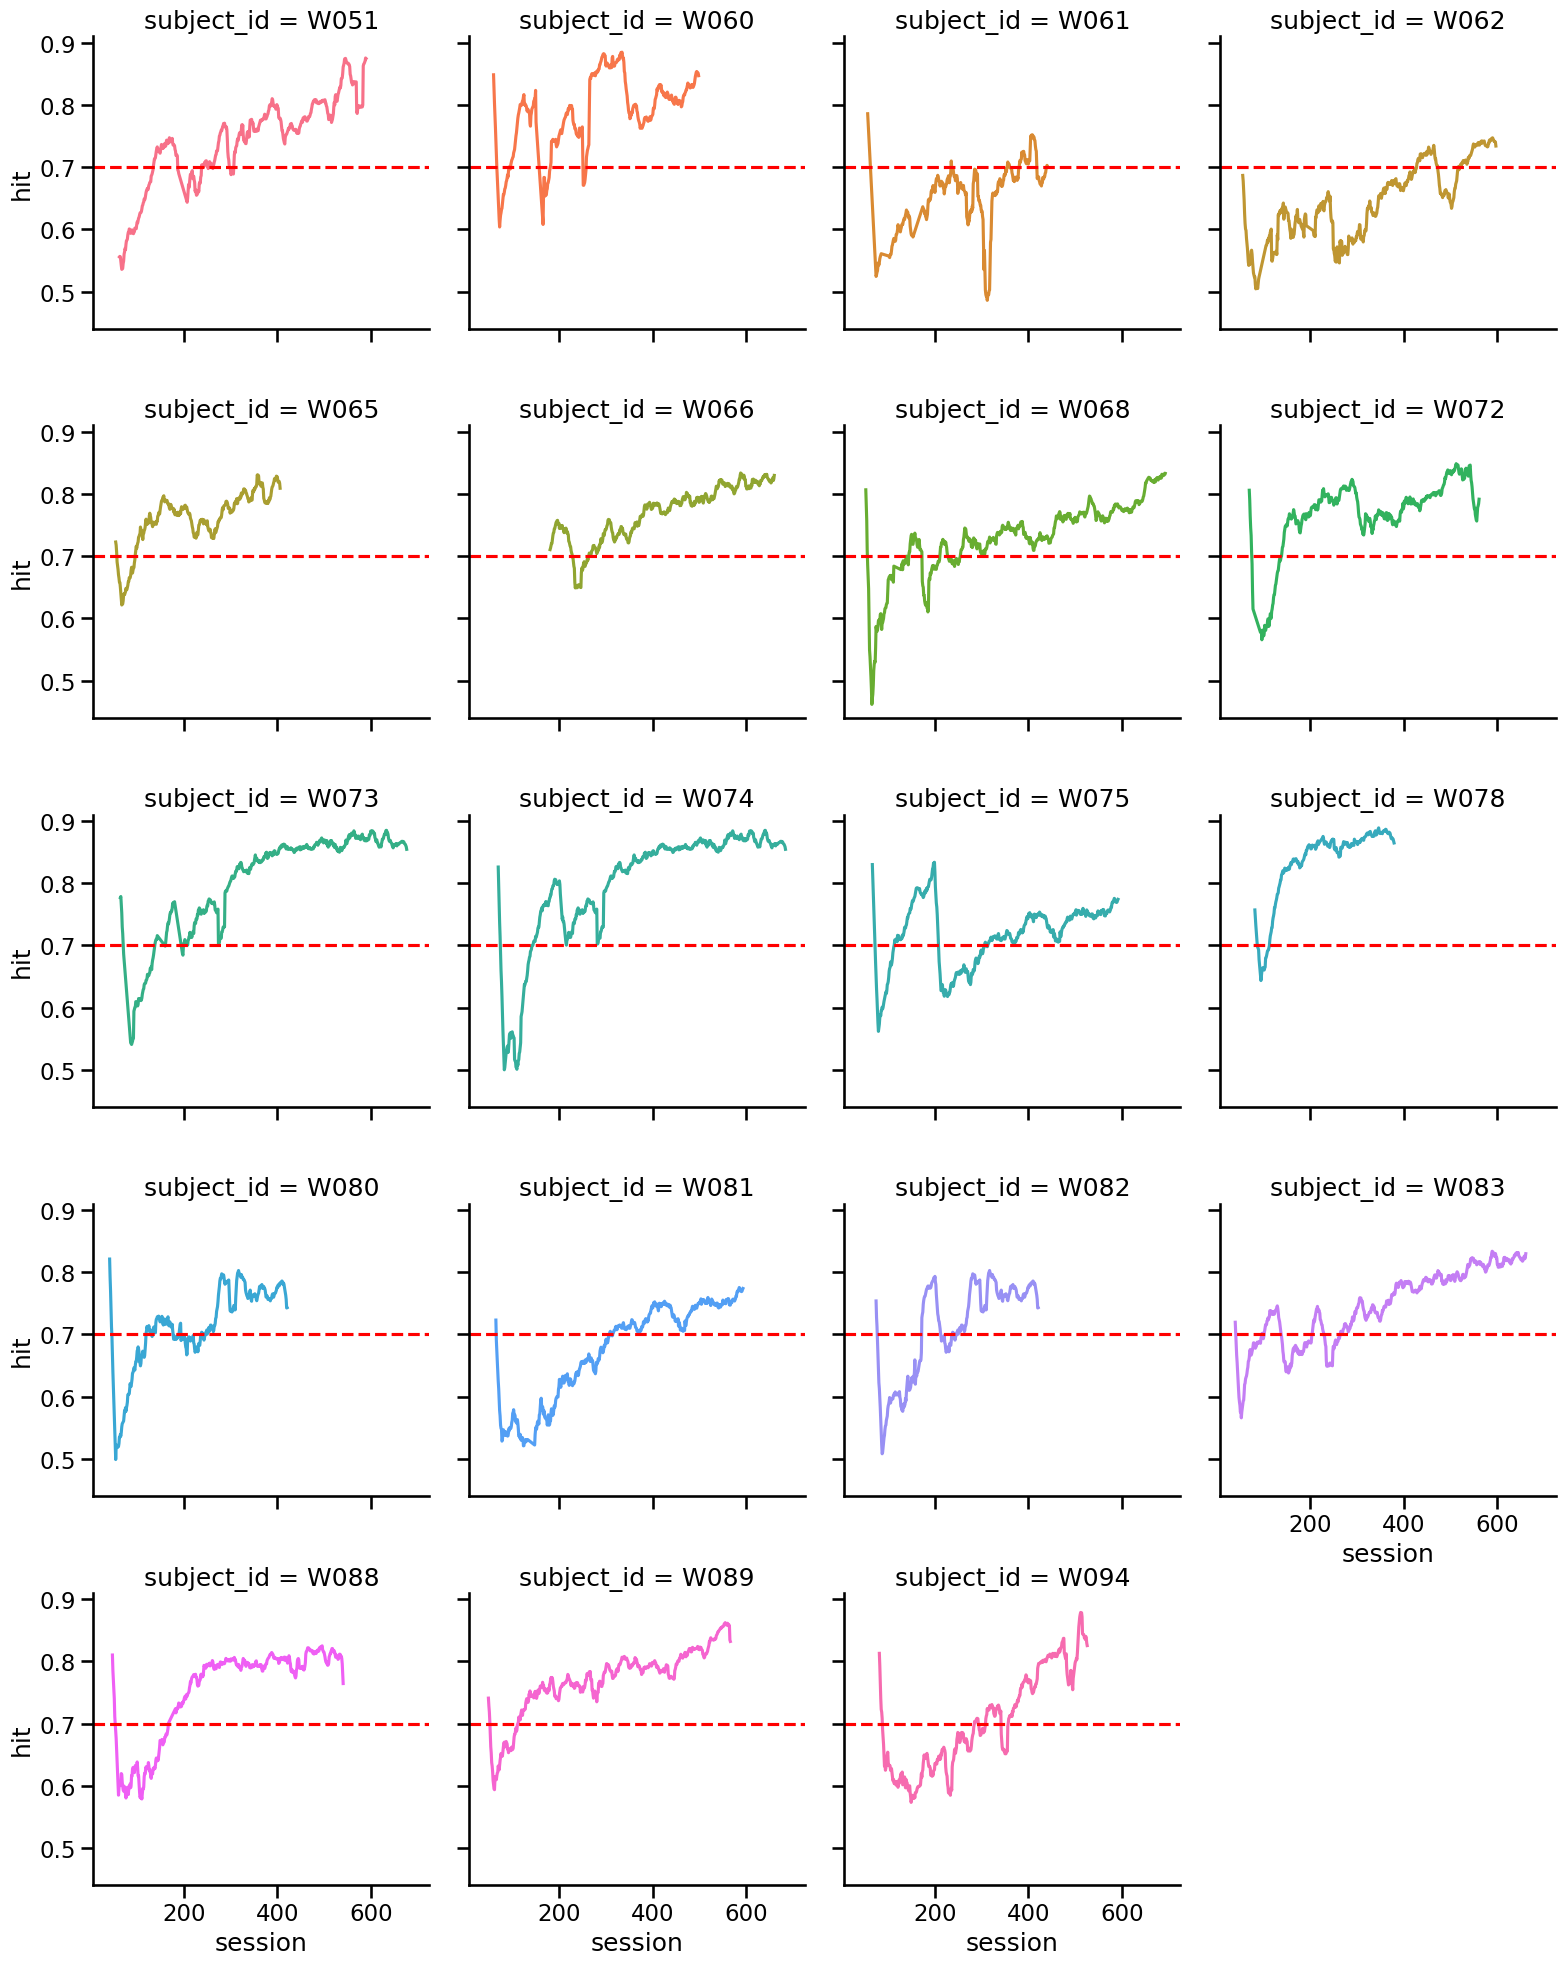

In [79]:
# Groupby subject and session, and calculate the mean hit for each subject-session combination
grouped_df = (
    RAT_DF.query("training_stage_cat == 4")
    .groupby(["subject_id", "session"])
    .hit.mean()
)

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()

# # Create the facet grid plot
g = sns.FacetGrid(
    data=rolling_mean, col="subject_id", col_wrap=4, hue="subject_id", height=4
)
g.map(sns.lineplot, "session", "hit")
g.map(plt.axhline, y=0.70, color="red", linestyle="--")

[(0.5, 1.0),
 Text(0, 0.5, 'Hit Rate'),
 Text(0.5, 0, 'Session'),
 Text(0.5, 1.0, 'W065 Performance Final Training Stage')]

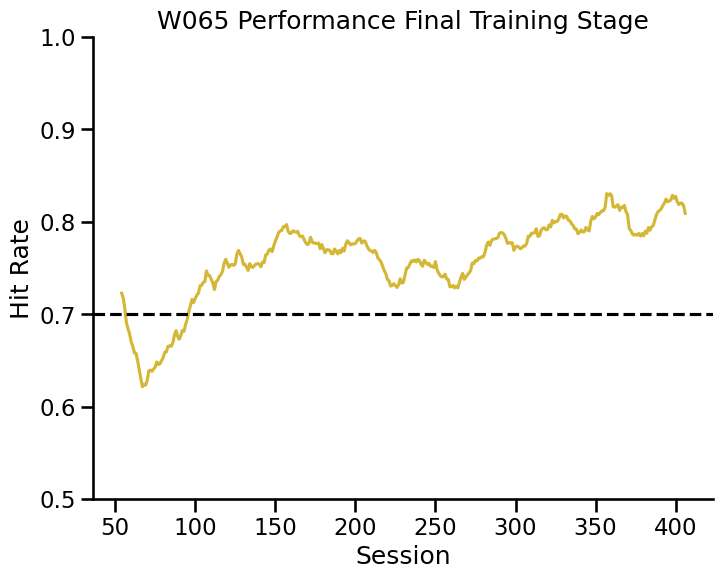

In [100]:
# Groupby subject and session, and calculate the mean hit for each subject-session combination
grouped_df = (
    RAT_DF.query("training_stage_cat == 4")
    .groupby(["subject_id", "session"])
    .hit.mean()
)

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
sns.despine()
sns.lineplot(
    data=rolling_mean.query("subject_id == 'W065'"),
    x="session",
    y="hit",
    color="#d4b735",
    ax=ax,
)
ax.axhline(y=0.70, color="black", linestyle="--")
ax.set(
    ylim=(0.5, 1),
    ylabel="Hit Rate",
    xlabel="Session",
    title="W065 Performance Final Training Stage",
)

In [102]:
threshold = 0.70
rolling_mean["crossed_threshold"] = (rolling_mean["hit"].shift() < threshold) & (
    rolling_mean["hit"] >= threshold
)
crossings_count = rolling_mean.groupby("subject_id")["crossed_threshold"].sum()

train_threshold_df = pd.DataFrame({"subject_id": crossings_count.index})
train_threshold_df["avg_hit"] = (
    RAT_DF.query("training_stage_cat == 4").groupby("subject_id").hit.mean().values
)
train_threshold_df["n_crossings"] = crossings_count.values
train_threshold_df["min_cross_sess"] = (
    rolling_mean.groupby("subject_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.min())
    .values
)
train_threshold_df["med_cross_sess"] = (
    rolling_mean.groupby("subject_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.median())
    .values
)
train_threshold_df["max_cross_sess"] = (
    rolling_mean.groupby("subject_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.max())
    .values
)

train_threshold_df

,subject_id,avg_hit,n_crossings,min_cross_sess,med_cross_sess,max_cross_sess
0,W051,0.749555,6,135,247.0,307
1,W060,0.792743,4,92,138.5,258
2,W061,0.649281,5,235,361.0,439
3,W062,0.666781,3,428,517.0,521
4,W065,0.763912,1,96,96.0,96
5,W066,0.760298,1,263,263.0,263
6,W068,0.755782,4,139,177.5,255
7,W072,0.779687,1,138,138.0,138
8,W073,0.817714,3,138,161.0,200
9,W074,0.816161,1,144,144.0,144


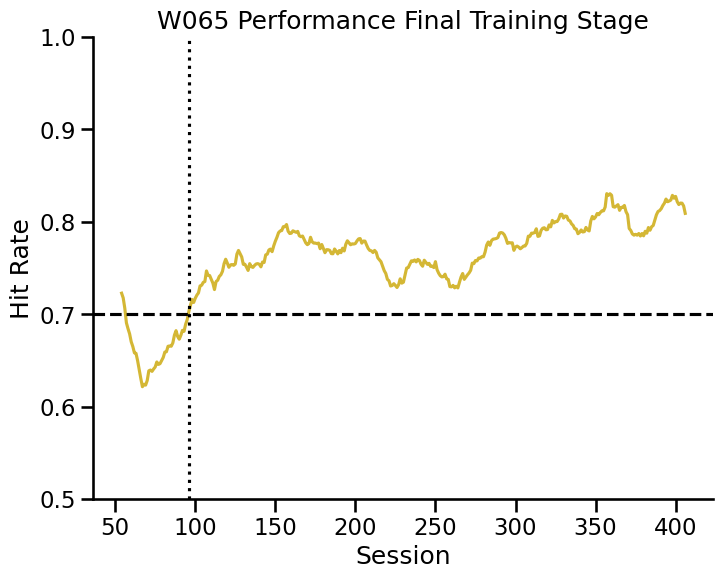

In [115]:
animal = "W065"
fig, ax = plt.subplots(figsize=(8, 6))
sns.despine()
sns.lineplot(
    data=rolling_mean.query("subject_id == @animal"),
    x="session",
    y="hit",
    color="#d4b735",
    ax=ax,
)
ax.axhline(y=0.70, color="black", linestyle="--")
ax.set(
    ylim=(0.5, 1),
    ylabel="Hit Rate",
    xlabel="Session",
    title=f"{animal} Performance Final Training Stage",
)

ax.axvline(
    x=train_threshold_df.query("subject_id == @animal")["max_cross_sess"].values[0],
    color="black",
    linestyle=":",
)

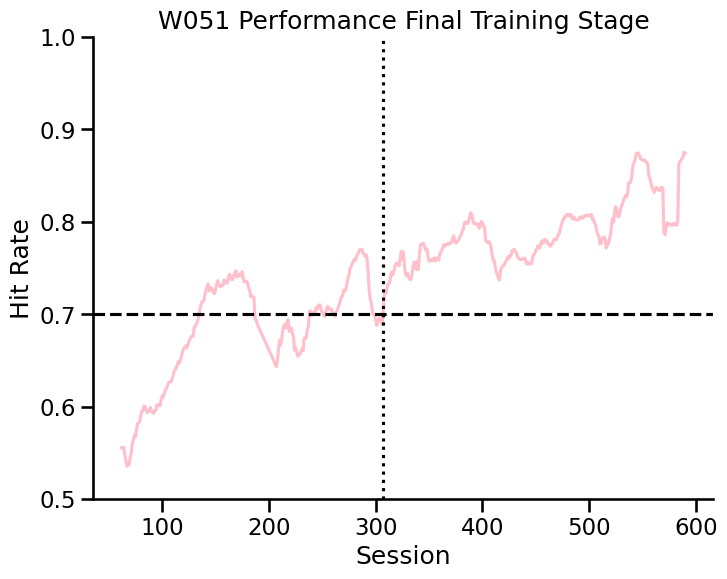

In [113]:
animal = "W051"
fig, ax = plt.subplots(figsize=(8, 6))
sns.despine()
sns.lineplot(
    data=rolling_mean.query("subject_id == @animal"),
    x="session",
    y="hit",
    color="pink",
    ax=ax,
)
ax.axhline(y=0.70, color="black", linestyle="--")
ax.set(
    ylim=(0.5, 1),
    ylabel="Hit Rate",
    xlabel="Session",
    title=f"{animal} Performance Final Training Stage",
)

ax.axvline(
    x=train_threshold_df.query("subject_id == @animal")["max_cross_sess"].values[0],
    color="black",
    linestyle=":",
)

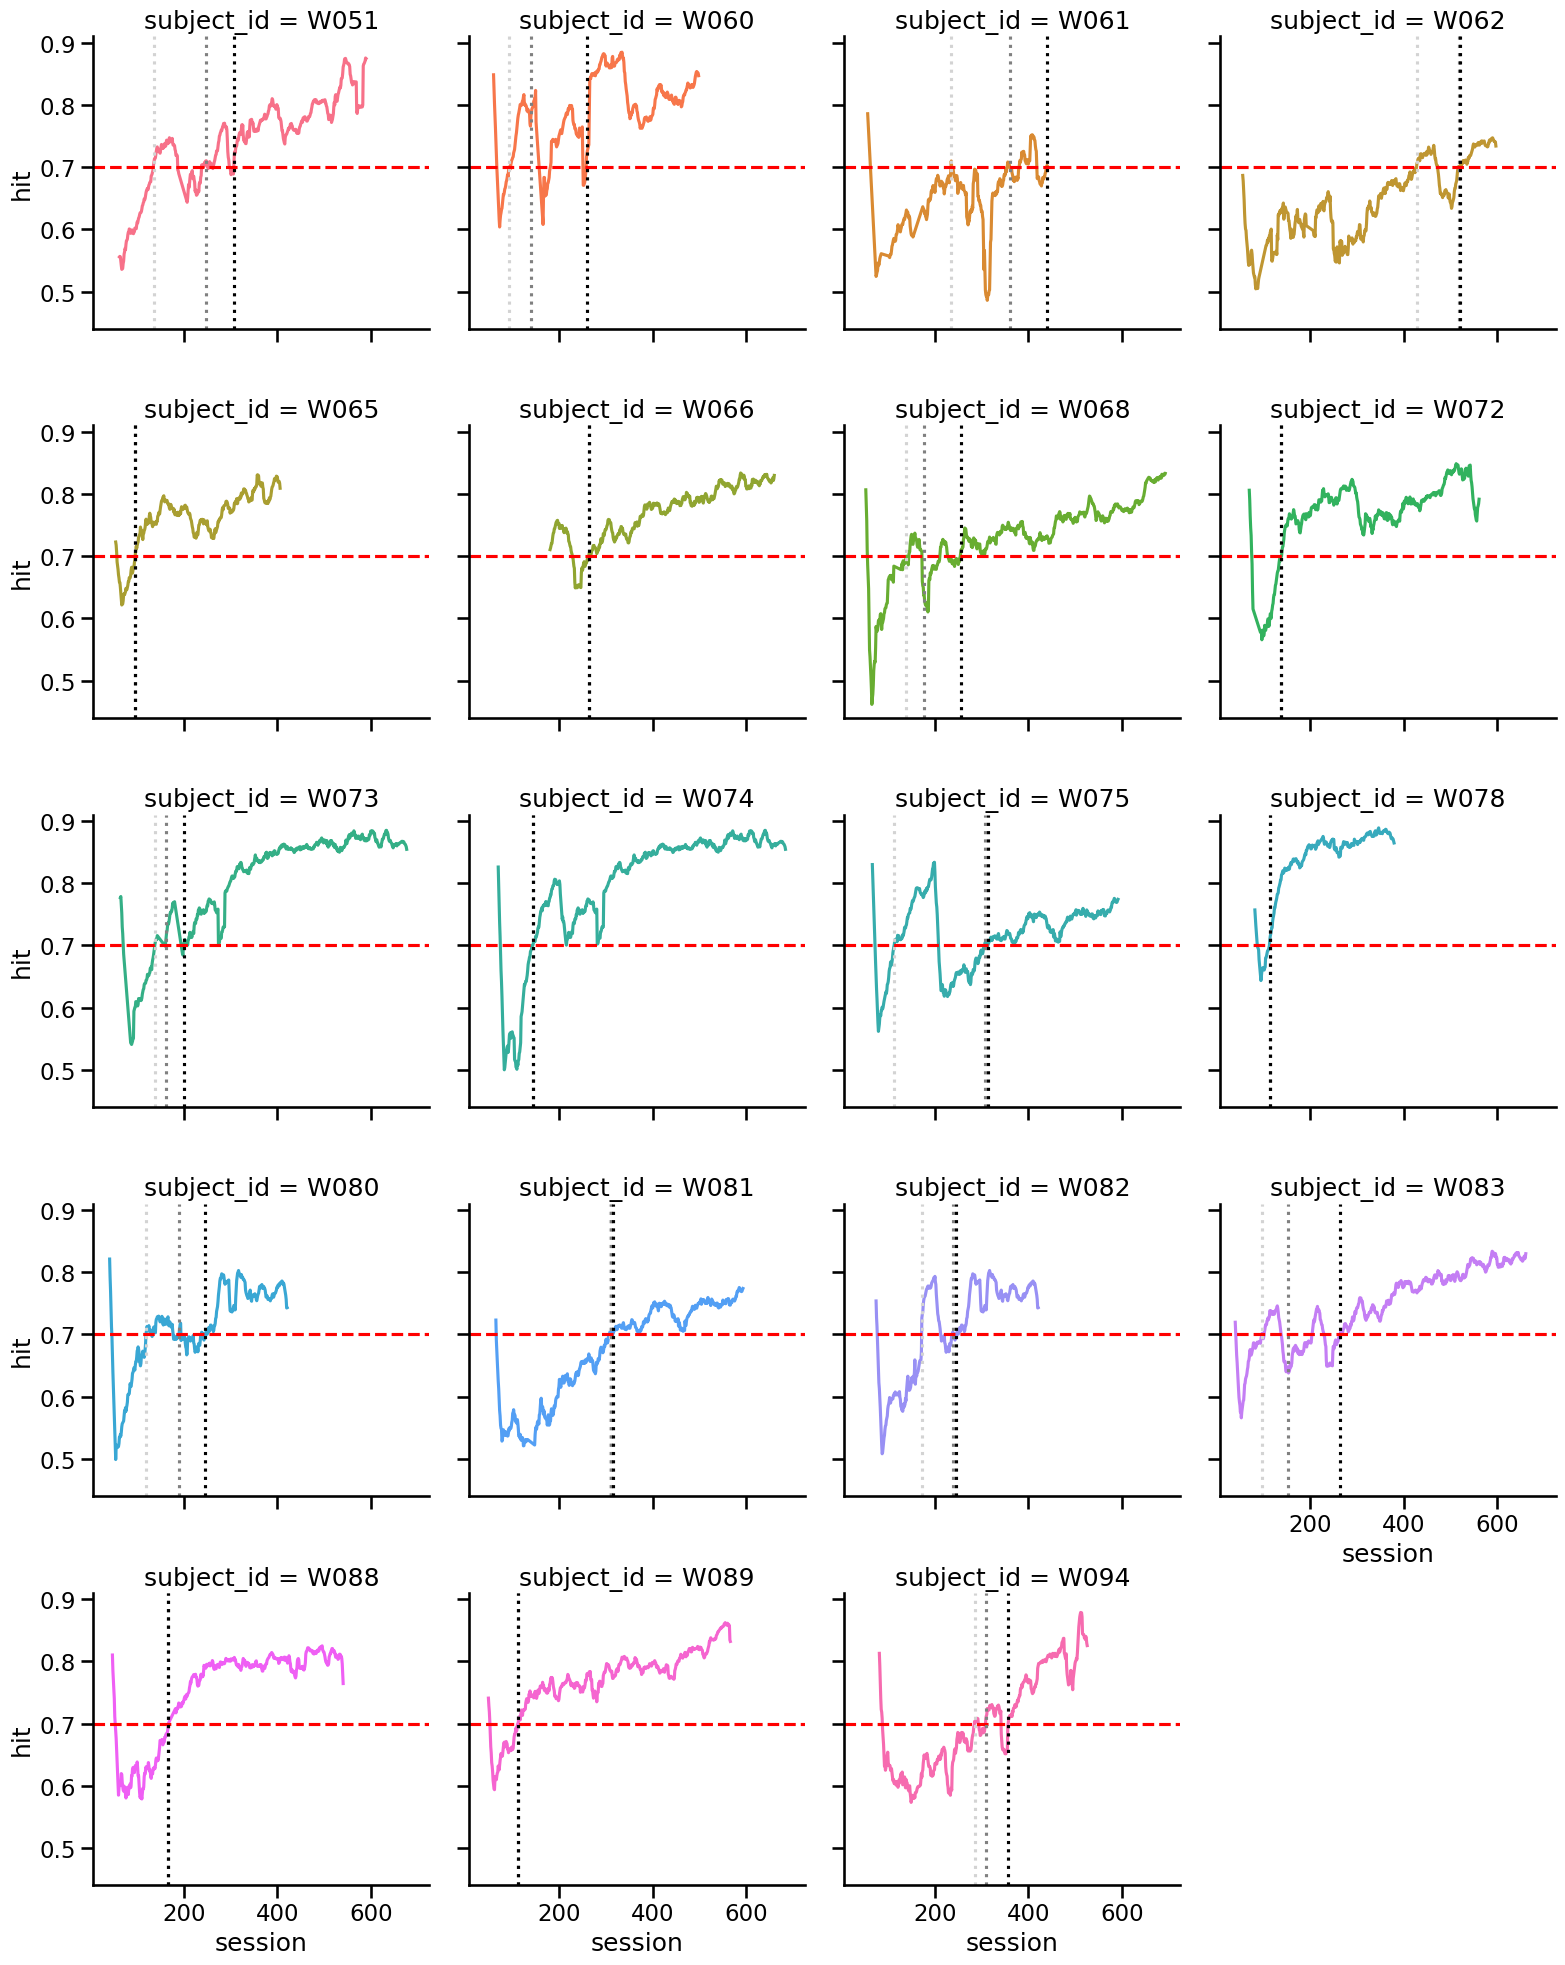

In [114]:
# # Create the facet grid plot
g = sns.FacetGrid(
    data=rolling_mean, col="subject_id", col_wrap=4, hue="subject_id", height=4
)
g.map(sns.lineplot, "session", "hit")
g.map(plt.axhline, y=0.70, color="red", linestyle="--")

for ii, ax in enumerate(g.axes.flat):
    ax.axvline(
        x=train_threshold_df["min_cross_sess"][ii], color="lightgray", linestyle=":"
    )
    ax.axvline(x=train_threshold_df["med_cross_sess"][ii], color="gray", linestyle=":")
    ax.axvline(x=train_threshold_df["max_cross_sess"][ii], color="black", linestyle=":")

[Text(0, 0.5, 'Time to Train'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Animals train on average in 250 +/- 112 sessions')]

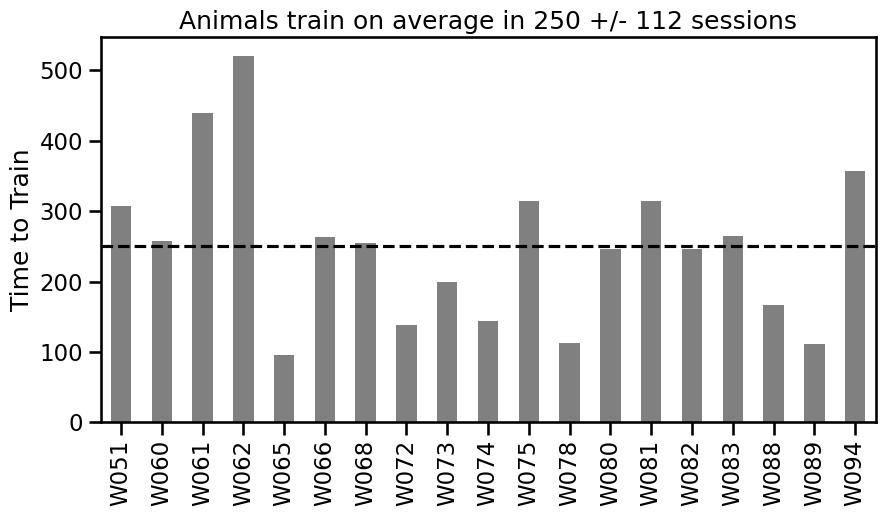

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
train_threshold_df.plot(
    kind="bar", x="subject_id", y="max_cross_sess", legend=False, ax=ax, color="gray"
)
ax.axhline(y=train_threshold_df["max_cross_sess"].mean(), color="k", linestyle="--")
ax.set(
    ylabel="Time to Train",
    xlabel="",
    title="Animals train on average in 250 +/- 112 sessions",
)

In [129]:
# Get final performance
post_trained_DF = RAT_DF.merge(
    train_threshold_df[["subject_id", "max_cross_sess"]], on="subject_id"
)

post_trained_DF = post_trained_DF[
    post_trained_DF["session"] > post_trained_DF["max_cross_sess"]
]

# Drop the 'max_cross_sess' column from the filtered dataframe

train_threshold_df["post_train_hit"] = train_threshold_df["subject_id"].map(
    post_trained_DF.groupby(["subject_id", "session"])["hit"]
    .mean()
    .reset_index()
    .groupby("subject_id")["hit"]
    .mean()
)

train_threshold_df["post_train_hit_overall"] = train_threshold_df["subject_id"].map(
    post_trained_DF.groupby("subject_id")["hit"].mean()
)


train_threshold_df

,subject_id,avg_hit,n_crossings,min_cross_sess,med_cross_sess,max_cross_sess,post_train_hit,post_train_hit_overall
0,W051,0.749555,6,135,247.0,307,0.792447,0.801475
1,W060,0.792743,4,92,138.5,258,0.825624,0.826593
2,W061,0.649281,5,235,361.0,439,0.686667,0.681574
3,W062,0.666781,3,428,517.0,521,0.731948,0.732291
4,W065,0.763912,1,96,96.0,96,0.775591,0.777494
5,W066,0.760298,1,263,263.0,263,0.783335,0.784154
6,W068,0.755782,4,139,177.5,255,0.759529,0.775531
7,W072,0.779687,1,138,138.0,138,0.787494,0.796141
8,W073,0.817714,3,138,161.0,200,0.834815,0.842962
9,W074,0.816161,1,144,144.0,144,0.826955,0.834430


In [165]:
train_threshold_df["violations"] = train_threshold_df["subject_id"].map(
    RAT_DF.query("session < 200")
    .groupby(["subject_id", "session"])
    .violation.mean()
    .reset_index()
    .groupby("subject_id")["violation"]
    .mean()
)

In [174]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = train_threshold_df["max_cross_sess"].values.reshape(-1, 1)
y = train_threshold_df["post_train_hit"].values.reshape(-1, 1)


# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     12.94
Date:                Sun, 24 Sep 2023   Prob (F-statistic):            0.00223
Time:                        18:52:03   Log-Likelihood:                 40.045
No. Observations:                  19   AIC:                            -76.09
Df Residuals:                      17   BIC:                            -74.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8383      0.018     47.108      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(400, 0.85, '$R^2$ = 0.429')

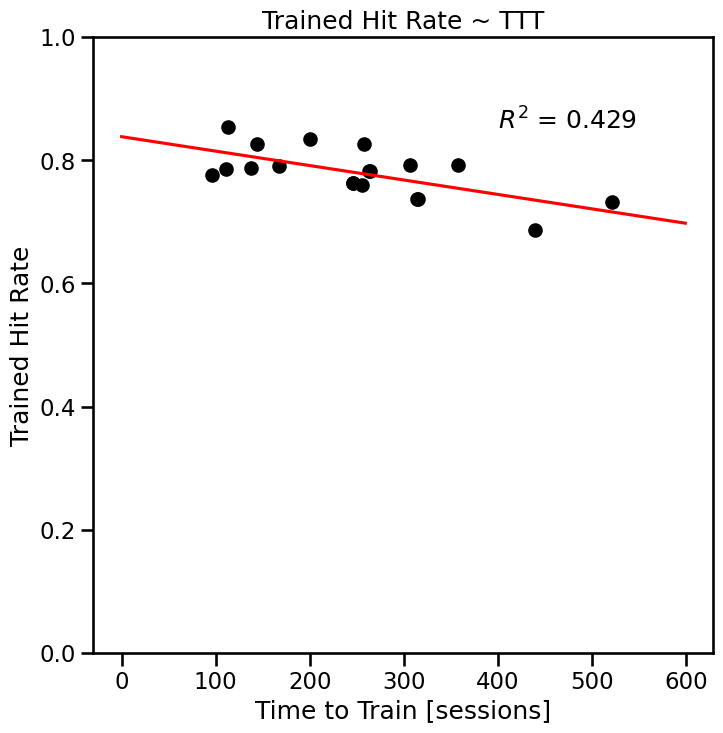

In [175]:
plt.figure(figsize=(8, 8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
plt.scatter(
    train_threshold_df["max_cross_sess"],
    train_threshold_df["post_train_hit"],
    color="black",
    label="Data",
)

# # Plot the line model
x_line = np.arange(0, 600, 1)

# # Calculate the corresponding y-values based on the linear regression model
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="red", label="Regression Line")

# Add labels and title
plt.ylabel("Trained Hit Rate")
plt.xlabel("Time to Train [sessions]")
plt.ylim(0, 1)
plt.title("Trained Hit Rate ~ TTT")

# # Add legend

plt.text(400, 0.85, "$R^2$ = 0.429")

In [176]:
X = train_threshold_df["violations"].values.reshape(-1, 1)
y = train_threshold_df["post_train_hit"].values.reshape(-1, 1)


# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.517
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0780
Time:                        18:52:17   Log-Likelihood:                 36.456
No. Observations:                  19   AIC:                            -68.91
Df Residuals:                      17   BIC:                            -67.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8275      0.027     30.719      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.7, 0.6, '$R^2$ =  0.171')

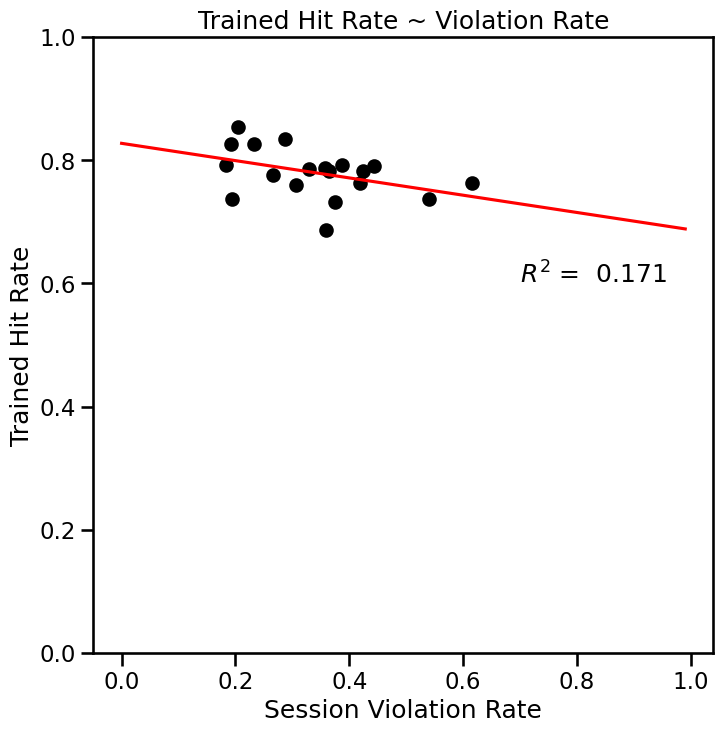

In [179]:
plt.figure(figsize=(8, 8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
plt.scatter(
    train_threshold_df["violations"],
    train_threshold_df["post_train_hit"],
    color="black",
    label="Data",
)

# # Plot the line model
x_line = np.arange(0, 1, 0.01)

# # Calculate the corresponding y-values based on the linear regression model
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="red", label="Regression Line")

# Add labels and title
plt.ylabel("Trained Hit Rate")
plt.xlabel("Session Violation Rate")
plt.ylim(0, 1)
plt.title("Trained Hit Rate ~ Violation Rate")

# # Add legend

plt.text(0.7, 0.6, "$R^2$ =  0.171")

In [180]:
def fit_linear_model(df, predictor, features, whiten=False, plot=True):
    """ """
    if whiten:
        # Standardize (whiten) the features
        X_unscaled = df[features]  # Features
        scaler = StandardScaler()
        X = scaler.fit_transform(X_unscaled)
    else:
        X = df[features]  # Features

    y = df[predictor]
    model = LinearRegression()
    model.fit(X, y)

    # Predict the target variable using the trained model
    predictions = model.predict(X)
    r_squared = model.score(X, y)

    # Assuming 'model' is your trained LinearRegression model
    weights = model.coef_
    bias = model.intercept_
    regressor_names = df[features].columns.tolist()

    if plot:
        fig, ax = plt.subplots(figsize=(8, 4))
        plot_weights(
            ax, regressor_names, weights, title=f"{predictor}, $R^2$ = {r_squared:.2f}"
        )
        return model, predictions, r_squared
    else:
        return model, predictions, r_squared, regressor_names, weights


def plot_weights(ax, regressor_names, weights, title):
    """ """
    ax.bar(regressor_names, weights)
    ax.axhline(y=0, color="k")

    ax.set(xlabel="", ylabel="Weight", title=title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    # plt.xticks(rotation=90)  # Rotating the x-axis labels if needed


def plot_predictions(ax, predictor, predictions, title):
    """ """
    ax.scatter(predictor, predictions)
    ax.axline([0, 0], [1, 1], color="k")

    data_range = max(predictor.max(), predictions.max()) * 1.2
    ax.set(
        xlim=(0, data_range),
        ylim=(0, data_range),
        xlabel="Actual",
        ylabel="Predicted",
        title=title,
    )

In [219]:
train_threshold_df["n_delays"] = train_threshold_df["subject_id"].map(
    RAT_DF.query("training_stage >= 3").groupby("subject_id").delay.nunique()
)

train_threshold_df["viol_stage_1"] = train_threshold_df["subject_id"].apply(
    lambda x: RAT_DF.query("training_stage_cat == 1 and subject_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df["viol_stage_3"] = train_threshold_df["subject_id"].apply(
    lambda x: RAT_DF.query("training_stage_cat == 3 and subject_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df["viol_stage_4"] = train_threshold_df["subject_id"].apply(
    lambda x: RAT_DF.query(
        "training_stage_cat == 4 and session < 200 and subject_id == @x"
    )["violation"].mean()
)

train_threshold_df.rename(columns={"max_cross_sess": "time_to_train"}, inplace=True)
data = train_threshold_df.drop(
    columns=[
        "min_cross_sess",
        "med_cross_sess",
        "post_train_hit_overall",
        "viol_all",
        "avg_hit",
    ],
)
data

,subject_id,n_crossings,time_to_train,post_train_hit,violations,n_delays,viol_stage_1,viol_stage_3,viol_stage_4
0,W051,6,307,0.792447,0.183063,9,0.209089,0.285115,0.142159
1,W060,4,258,0.825624,0.191715,4,0.227650,0.307809,0.127991
2,W061,5,439,0.686667,0.358662,12,0.324265,0.482759,0.243503
3,W062,3,521,0.731948,0.375028,4,0.345299,0.459142,0.290948
4,W065,1,96,0.775591,0.265515,4,0.191802,0.355118,0.241760
5,W066,1,263,0.783335,0.423824,10,0.144125,0.468064,0.248819
6,W068,4,255,0.759529,0.306897,4,0.180725,0.364035,0.261805
7,W072,1,138,0.787494,0.356531,3,0.300287,0.515880,0.254548
8,W073,3,200,0.834815,0.286405,3,0.248090,0.355938,0.212520
9,W074,1,144,0.826955,0.233385,3,0.157221,0.382815,0.161615


In [220]:
features = ["n_crossings", "time_to_train", "violations", "n_delays"]
predictor = "post_train_hit"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_48515/2373490048.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

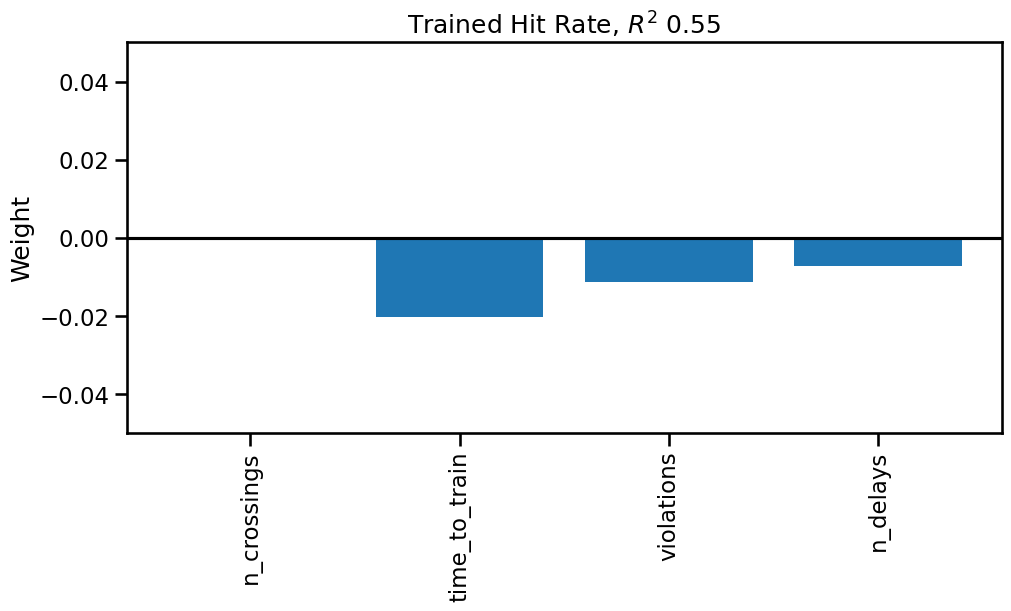

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

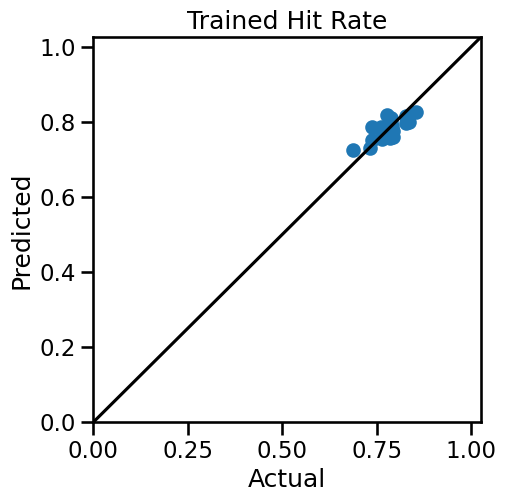

In [222]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_predictions(ax, data[predictor], predict, title="Trained Hit Rate")

In [245]:
features = [
    "n_crossings",
    "time_to_train",
    "viol_stage_1",
    "viol_stage_3",
    "viol_stage_4",
    "n_delays",
]
predictor = "post_train_hit"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_48515/2373490048.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

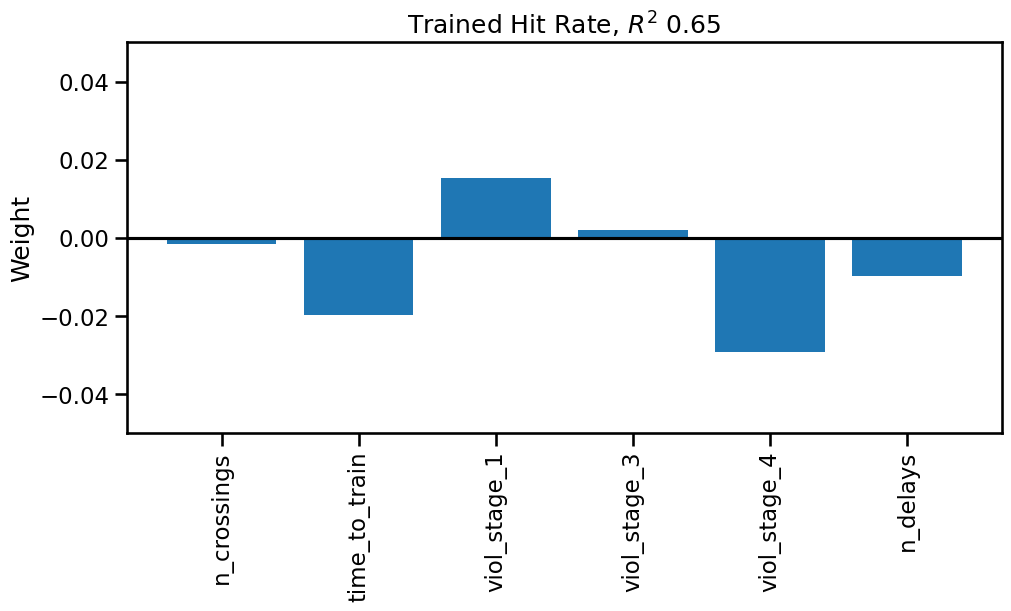

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

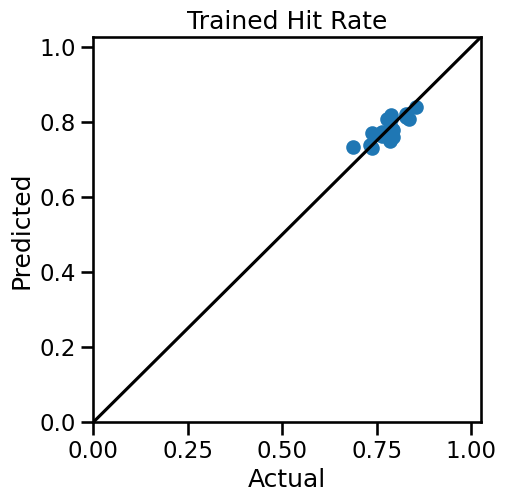

In [232]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_predictions(ax, data[predictor], predict, title="Trained Hit Rate")

In [243]:
features = [
    "n_crossings",
    "time_to_train",
    "viol_stage_4",
    "n_delays",
]
predictor = "post_train_hit"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_48515/2373490048.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

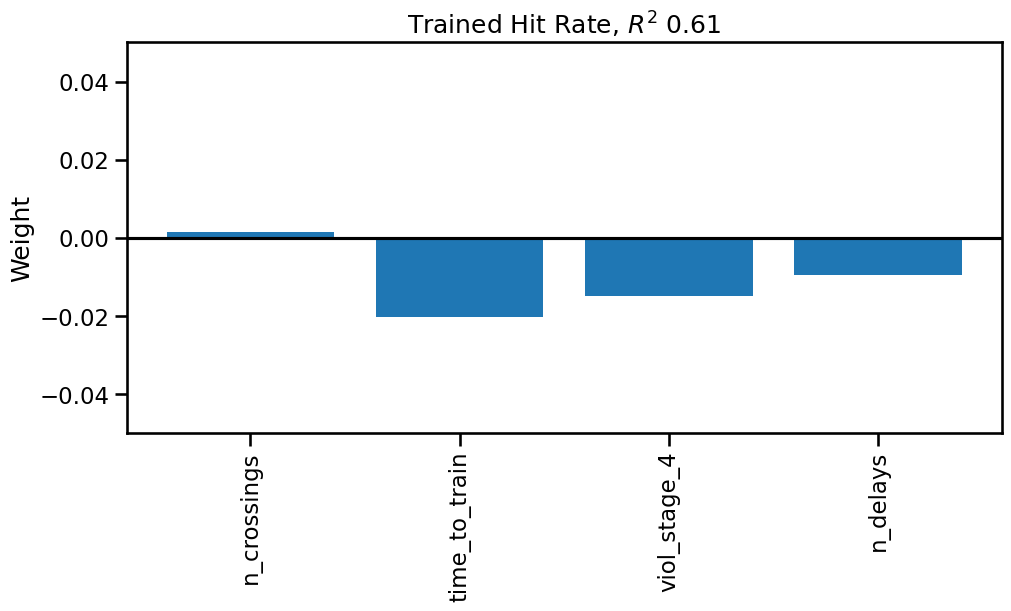

In [244]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

In [233]:
features = [
    "n_crossings",
    "violations",
    "n_delays",
]
predictor = "time_to_train"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_48515/2373490048.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


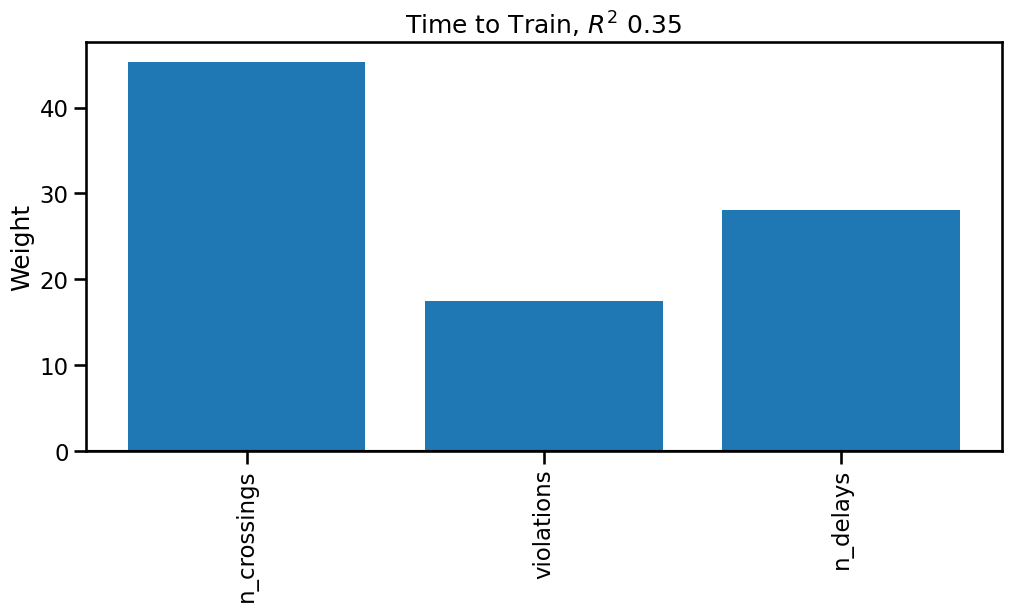

In [234]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Time to Train, $R^2$ {rsq:.2f}")
# plt.ylim(-0.05, 0.05)

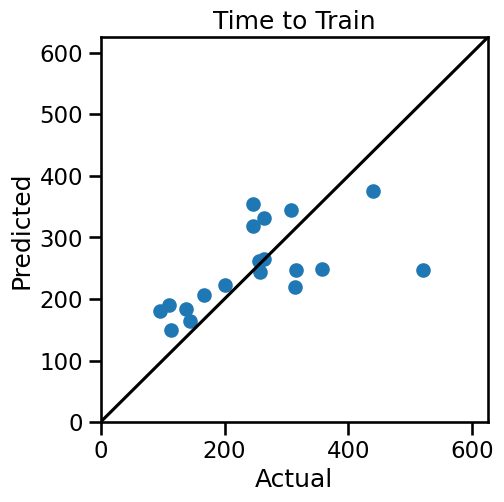

In [235]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_predictions(ax, data[predictor], predict, title="Time to Train")